# Intro to Pandas
by Ryan Orsinger

## Module 2: Introducing DataFrames

### Pandas DataFrames Basics - Part 2
- Helpful Jupyter features
- Importing a CSV dataset
- Selecting multiple columns
- Counting True values in a Boolean series
- Filtering rows with Boolean masks
- Using AND and OR operators
- Why and when to use .copy
- Sorting a dataframe by one or more columns

In [2]:
import pandas as pd

In [4]:
# pd.read_csv reads a comma-separated value file and returns a dataframe
mpg = pd.read_csv("https://static.anaconda.cloud/shared/lms/data_analysis/Intro_to_pandas_data_analysis/assets/mpg.csv", storage_options = {'User-Agent': 'Mozilla/5.0'})
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [6]:
# Showing the object.tab autocomplete option
# Type the variable that's already been evaluated in memory
# This works with imported modules, too
# Type .
# Then type the <Tab> character
mpg.count?

Signature: mpg.count(axis: 'Axis' = 0, numeric_only: 'bool' = False)
Docstring:
Count non-NA cells for each column or row.

The values `None`, `NaN`, `NaT`, ``pandas.NA`` are considered NA.

Parameters
----------
axis : {0 or 'index', 1 or 'columns'}, default 0
    If 0 or 'index' counts are generated for each column.
    If 1 or 'columns' counts are generated for each row.
numeric_only : bool, default False
    Include only `float`, `int` or `boolean` data.

Returns
-------
Series
    For each column/row the number of non-NA/null entries.

See Also
--------
Series.count: Number of non-NA elements in a Series.
DataFrame.value_counts: Count unique combinations of columns.
DataFrame.shape: Number of DataFrame rows and columns (including NA
    elements).
DataFrame.isna: Boolean same-sized DataFrame showing places of NA
    elements.

Examples
--------
Constructing DataFrame from a dictionary:

>>> df = pd.DataFrame({"Person":
...                    ["John", "Myla", "Lewis", "John", "Myla

In [8]:
# Pulling up the docstring for a method
mpg.head?

Signature: mpg.head(n: 'int' = 5) -> 'Self'
Docstring:
Return the first `n` rows.

This function returns the first `n` rows for the object based
on position. It is useful for quickly testing if your object
has the right type of data in it.

For negative values of `n`, this function returns all rows except
the last `|n|` rows, equivalent to ``df[:n]``.

If n is larger than the number of rows, this function returns all rows.

Parameters
----------
n : int, default 5
    Number of rows to select.

Returns
-------
same type as caller
    The first `n` rows of the caller object.

See Also
--------
DataFrame.tail: Returns the last `n` rows.

Examples
--------
>>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
>>> df
      animal
0  alligator
1        bee
2     falcon
3       lion
4     monkey
5     parrot
6      shark
7      whale
8      zebra

Viewing the first 5 lines

>>> df.head()
      animal
0 

In [10]:
# .tail looks at the last records of a pandas object (series or datafram)
mpg.tail(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


In [12]:
# The square brackets on the dataframe can accept a list of column names 
columns_of_interest = ["displ", "cty", "hwy"]
mpg[columns_of_interest].head()
#mpg[["displ", "cty", "hwy"]]

,displ,cty,hwy
0,1.8,18,29
1,1.8,21,29
2,2.0,20,31
3,2.0,21,30
4,2.8,16,26


In [14]:
# You'll also see the same result with double square brackets
mpg[["cty", "hwy"]].head()

,cty,hwy
0,18,29
1,21,29
2,20,31
3,21,30
4,16,26


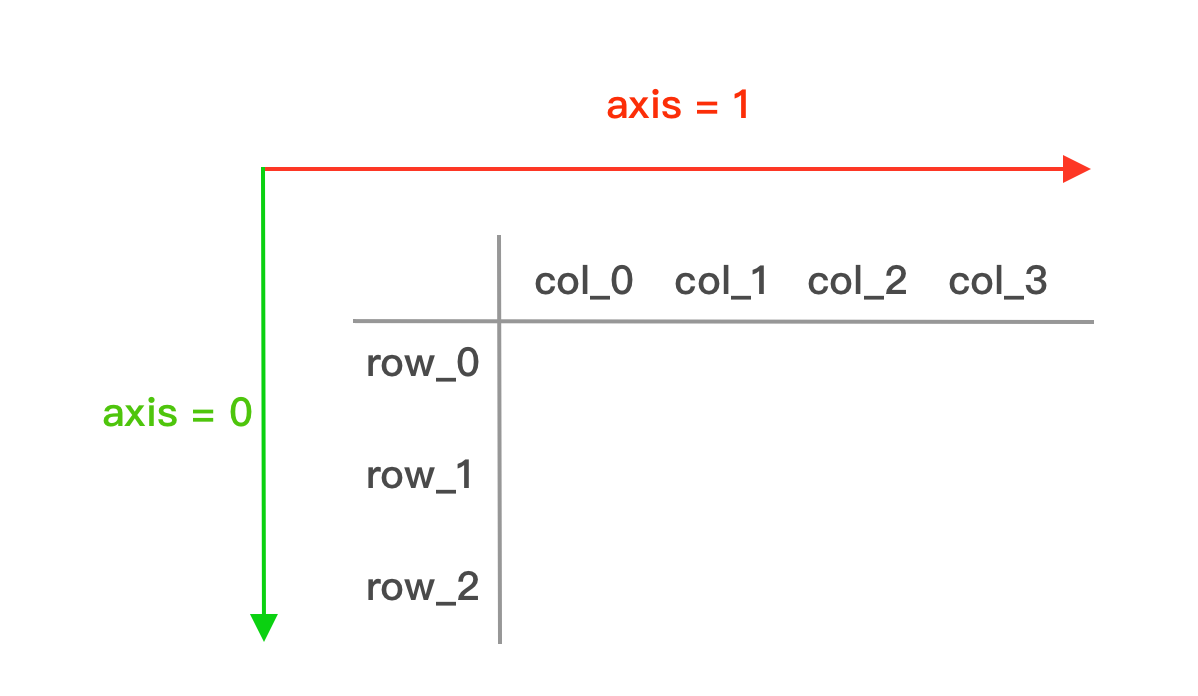

In [16]:
# Our functions like .mean, .sum, .median, min/max evaluate an entire column, by default
# There's a default argument in .mean() that's axis=0 (which means column)
mpg[["cty", "hwy"]].mean(axis=0)

cty    16.858974
hwy    23.440171
dtype: float64

In [18]:
mpg[["cty", "hwy"]].head()

,cty,hwy
0,18,29
1,21,29
2,20,31
3,21,30
4,16,26


In [20]:
# axis=1 means execute the .mean on each row, row-wise execution
mpg[["cty", "hwy"]].mean(axis=1).head()

0    23.5
1    25.0
2    25.5
3    25.5
4    21.0
dtype: float64

In [22]:
# axis=1 calculates the row-wise average
mpg["average_mileage"] = mpg[["cty", "hwy"]].mean(axis=1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [24]:
# value_counts shows unique values and their distribution
mpg.cyl.value_counts()

cyl
4    81
6    79
8    70
5     4
Name: count, dtype: int64

In [26]:
mpg.shape

(234, 12)

In [28]:
# Using Boolean Series to answer questions
# How many audis in the dataset
# True works as a 1, False works as 0
(mpg.manufacturer == "audi").sum()

18

In [30]:
# What proportion of engines are 4 cylinders?
(mpg.cyl == 4).mean()

0.34615384615384615

In [32]:
# Using Boolean Series to filter a dataframe
mpg[mpg.cyl == 5]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
217,volkswagen,jetta,2.5,2008,5,auto(s6),f,21,29,r,compact,25.0
218,volkswagen,jetta,2.5,2008,5,manual(m5),f,21,29,r,compact,25.0
225,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact,24.0
226,volkswagen,new beetle,2.5,2008,5,auto(s6),f,20,29,r,subcompact,24.5


In [34]:
# You can mix and match the columns used to generate Booleans, the Boolean values don't care
mpg[(mpg.model == "maxima") | (mpg.cyl == 5)]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
147,nissan,maxima,3.0,1999,6,auto(l4),f,18,26,r,midsize,22.0
148,nissan,maxima,3.0,1999,6,manual(m5),f,19,25,r,midsize,22.0
149,nissan,maxima,3.5,2008,6,auto(av),f,19,25,p,midsize,22.0
217,volkswagen,jetta,2.5,2008,5,auto(s6),f,21,29,r,compact,25.0
218,volkswagen,jetta,2.5,2008,5,manual(m5),f,21,29,r,compact,25.0
225,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact,24.0
226,volkswagen,new beetle,2.5,2008,5,auto(s6),f,20,29,r,subcompact,24.5


In [36]:
# AND limits options. Both predicates must be true
mpg[(mpg["class"] == "midsize") & (mpg["displ"] < 2)]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
227,volkswagen,passat,1.8,1999,4,manual(m5),f,21,29,p,midsize,25.0
228,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize,23.5


In [38]:
original_df = pd.DataFrame({"x": [1, 2, 3]})
original_df

,x
0,1
1,2
2,3


In [40]:
# Be careful assigning Python collections like this...
# This works the same way with lists, dictionaries, and many other collection objects
new_df = original_df
new_df

,x
0,1
1,2
2,3


In [42]:
original_df["y"] = original_df.x * 100
original_df

,x,y
0,1,100
1,2,200
2,3,300


In [ ]:
new_df

In [44]:
# Use .copy to make a proper copy of a dataframe
new_df = original_df.copy()
new_df

,x,y
0,1,100
1,2,200
2,3,300


In [46]:
original_df["z"] = 5000
original_df

,x,y,z
0,1,100,5000
1,2,200,5000
2,3,300,5000


In [48]:
# The new df was created from a copy and avoids future mutation to the original dataframe
new_df

,x,y
0,1,100
1,2,200
2,3,300


In [50]:
# Sorting by a single column
mpg.sort_values(by=["average_mileage"], ascending=False, ignore_index=True).head()
#top 5 highest average milage vehicles

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
0,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,39.5
1,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,38.5
2,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,35.0
3,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,32.5
4,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact,30.5


In [52]:
# Sorting by multiple columns
mpg.sort_values(by=["hwy", "cty"], ascending=False, ignore_index=True).head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
0,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,39.5
1,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,38.5
2,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,35.0
3,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,32.5
4,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact,30.5


In [54]:
# Updating the dataframe to store the sorted values
# Use inplace=True or reassign the dataframe variable (not both)
mpg.sort_values(by="displ", ascending=False, ignore_index=True, inplace=True)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
0,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater,19.5
1,chevrolet,k1500 tahoe 4wd,6.5,1999,8,auto(l4),4,14,17,d,suv,15.5
2,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater,20.0
3,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,21.0
4,jeep,grand cherokee 4wd,6.1,2008,8,auto(l5),4,11,14,p,suv,12.5


## Additional Resources
- [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [Pandas Comparison to Spreadsheets](https://pandas.pydata.org/docs/dev/getting_started/comparison/comparison_with_spreadsheets.html)
- [Pandas Comparison to SQL](https://pandas.pydata.org/docs/dev/getting_started/comparison/comparison_with_sql.html)

## Exercises
- Create a new column named `is_automatic` that holds a Boolean if that given vehicle is an automatic transmition or not. 
- Use the `is_automatic` column to sum up the number of automatic vehicles in this dataset.
- Write the pandas code to determine what percentage of the vehicles are subcompacts?
- Combined fuel economy is a weighted average of the city value by 55% and the highway value by 45%. Use arithmetic operators to add a new column named `fuel_economy` to the `mpg` dataframe.
- Use Boolean masking to find all of the vehicles with a `fuel_economy` above the median `fuel_economy`.



In [64]:
# Create a new column named `is_automatic` that holds a Boolean if that given vehicle is an automatic transmition or not. 
mpg["is_automatic"] = mpg["trans"].str.contains("auto")
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic
0,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater,19.5,False
1,chevrolet,k1500 tahoe 4wd,6.5,1999,8,auto(l4),4,14,17,d,suv,15.5,True
2,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater,20.0,True
3,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,21.0,False
4,jeep,grand cherokee 4wd,6.1,2008,8,auto(l5),4,11,14,p,suv,12.5,True


In [86]:
mpg.shape

(234, 13)

In [123]:
# Use the `is_automatic` column to sum up the number of automatic vehicles in this dataset.
(mpg.is_automatic == True).sum()

157

In [185]:
mpg["is_automatic"].sum()

157

In [125]:
mpg.is_automatic.value_counts()

is_automatic
True     157
False     77
Name: count, dtype: int64

In [106]:
# Write the pandas code to determine what percentage of the vehicles are subcompacts?
class_count = mpg["class"].value_counts()
subcompact_count = class_count.get("subcompact", 0)
total_count = len(mpg)
percentage_subcompact = (subcompact_count / total_count) * 100
percentage_subcompact

14.957264957264957

In [187]:
# Create a `fuel_economy` column. Fuel economy is a weighted average of the city value by 55% and the highway value by 45%
mpg["fuel_economy"] = (mpg["cty"] * 55 + mpg ["hwy"] * 45) / 100
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic,fuel_economy,above_median_fuel_economy
0,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater,19.5,False,19.05,False
1,chevrolet,k1500 tahoe 4wd,6.5,1999,8,auto(l4),4,14,17,d,suv,15.5,True,15.35,False
2,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater,20.0,True,19.50,False
3,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,21.0,False,20.50,True
4,jeep,grand cherokee 4wd,6.1,2008,8,auto(l5),4,11,14,p,suv,12.5,True,12.35,False


In [155]:
# Use Boolean masking to find all of the vehicles with a `fuel_economy` above the median `fuel_economy`.
fe_median = mpg["fuel_economy"].median()
mpg["above_median_fuel_economy"] = mpg["fuel_economy"] > fe_median
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic,fuel_economy,above_median_fuel_economy
0,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater,19.5,False,19.05,False
1,chevrolet,k1500 tahoe 4wd,6.5,1999,8,auto(l4),4,14,17,d,suv,15.5,True,15.35,False
2,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater,20.0,True,19.50,False
3,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,21.0,False,20.50,True
4,jeep,grand cherokee 4wd,6.1,2008,8,auto(l5),4,11,14,p,suv,12.5,True,12.35,False


In [191]:
median_fuel_economy = mpg['fuel_economy'].median()
above_median_fuel_economy = mpg[mpg['fuel_economy'] > median_fuel_economy] 
print(above_median_fuel_economy[['manufacturer', 'model', 'fuel_economy']].head())

   manufacturer     model  fuel_economy
3     chevrolet  corvette         20.50
10    chevrolet  corvette         20.50
74         ford   mustang         21.05
90         ford   mustang         21.60
91         ford   mustang         21.15


In [207]:
# Use .loc to filter the rows where average milage is greater than 30. Display the first 5 rows of the filtered data.
mpg.loc[mpg["average_mileage"] > 30].head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic,fuel_economy,above_median_fuel_economy,avg_mileage
212,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,39.5,False,39.05,True,39.5
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,38.5,False,37.95,True,38.5
214,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,35.0,True,34.40,True,35.0
215,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact,30.5,True,30.05,True,30.5
221,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,32.5,False,32.05,True,32.5


In [209]:
# Filter the dataset using .loc to find all cars with 4 cylinders and display their city, highway, and displacement.
mpg.loc[:,["cyl","cty","hwy","displ"]][mpg["cyl"] == 4].head()

,cyl,cty,hwy,displ
145,4,16,20,2.7
146,4,15,20,2.7
147,4,16,20,2.7
148,4,15,20,2.7
150,4,17,22,2.7


In [211]:
# Filter cars with city > 20 and displacement < 2.
filtered_cars = mpg[(mpg['cty'] > 20) & (mpg['displ'] < 2)]
print(filtered_cars)

    manufacturer       model  displ  year  cyl       trans drv  cty  hwy fl  \
212   volkswagen  new beetle    1.9  1999    4  manual(m5)   f   35   44  d   
213   volkswagen       jetta    1.9  1999    4  manual(m5)   f   33   44  d   
214   volkswagen  new beetle    1.9  1999    4    auto(l4)   f   29   41  d   
215       toyota     corolla    1.8  2008    4    auto(l4)   f   26   35  r   
219   volkswagen      passat    1.8  1999    4  manual(m5)   f   21   29  p   
221       toyota     corolla    1.8  2008    4  manual(m5)   f   28   37  r   
222        honda       civic    1.8  2008    4  manual(m5)   f   26   34  r   
223        honda       civic    1.8  2008    4    auto(l5)   f   25   36  r   
224        honda       civic    1.8  2008    4    auto(l5)   f   24   36  c   
225         audi          a4    1.8  1999    4  manual(m5)   f   21   29  p   
226       toyota     corolla    1.8  1999    4    auto(l3)   f   24   30  r   
227       toyota     corolla    1.8  1999    4    au

In [203]:
# Sort the dataset by average milage in descending order
mpg['avg_mileage'] = (mpg['cty'] + mpg['hwy']) / 2
sorted_mpg = mpg.sort_values(by='avg_mileage', ascending=False)
print(sorted_mpg)

    manufacturer                model  displ  year  cyl       trans drv  cty  \
212   volkswagen           new beetle    1.9  1999    4  manual(m5)   f   35   
213   volkswagen                jetta    1.9  1999    4  manual(m5)   f   33   
214   volkswagen           new beetle    1.9  1999    4    auto(l4)   f   29   
221       toyota              corolla    1.8  2008    4  manual(m5)   f   28   
215       toyota              corolla    1.8  2008    4    auto(l4)   f   26   
..           ...                  ...    ...   ...  ...         ...  ..  ...   
44         dodge          durango 4wd    4.7  2008    8    auto(l5)   4    9   
49         dodge  ram 1500 pickup 4wd    4.7  2008    8    auto(l5)   4    9   
45         dodge  ram 1500 pickup 4wd    4.7  2008    8  manual(m6)   4    9   
38         dodge    dakota pickup 4wd    4.7  2008    8    auto(l5)   4    9   
51          jeep   grand cherokee 4wd    4.7  2008    8    auto(l5)   4    9   

     hwy fl       class  average_mileag

In [213]:
# Select top 5 cars with the highest displacement (use nlargest)
mpg.nlargest(5, "displ")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic,fuel_economy,above_median_fuel_economy,avg_mileage
0,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater,19.5,False,19.05,False,19.5
1,chevrolet,k1500 tahoe 4wd,6.5,1999,8,auto(l4),4,14,17,d,suv,15.5,True,15.35,False,15.5
2,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater,20.0,True,19.50,False,20.0
3,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,21.0,False,20.50,True,21.0
4,jeep,grand cherokee 4wd,6.1,2008,8,auto(l5),4,11,14,p,suv,12.5,True,12.35,False,12.5


In [215]:
mpg.nlargest(5, "average_mileage")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic,fuel_economy,above_median_fuel_economy,avg_mileage
212,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,39.5,False,39.05,True,39.5
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,38.5,False,37.95,True,38.5
214,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,35.0,True,34.40,True,35.0
221,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,32.5,False,32.05,True,32.5
215,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact,30.5,True,30.05,True,30.5


In [217]:
# Calculate average cty for SUV vehicles


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic,fuel_economy,above_median_fuel_economy,avg_mileage
229,honda,civic,1.6,1999,4,manual(m5),f,25,32,r,subcompact,28.5,False,28.15,True,28.5
230,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact,28.0,True,27.60,True,28.0
231,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact,30.5,False,30.25,True,30.5
232,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact,28.0,True,27.60,True,28.0
233,honda,civic,1.6,1999,4,manual(m5),f,23,29,p,subcompact,26.0,False,25.70,True,26.0


In [221]:
mpg[mpg["class"]=="suv"]["cty"].mean()

13.5

In [225]:
# Find the vehicles with highest and lowest average mileage (use nlargest and nsmallest)
mpg.nlargest(1, "average_mileage")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic,fuel_economy,above_median_fuel_economy,avg_mileage
212,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,39.5,False,39.05,True,39.5


In [227]:
mpg.nsmallest(1, "average_mileage")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic,fuel_economy,above_median_fuel_economy,avg_mileage
38,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,10.5,True,10.35,False,10.5


In [229]:
# Create another column named "avg_miles/litre". Use average_milage to convert from miles per gallons to miles per litre. Search online.
mpg["avg_miles/litre"] = mpg["average_mileage"] * 0.22
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic,fuel_economy,above_median_fuel_economy,avg_mileage,avg_miles/litre
0,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater,19.5,False,19.05,False,19.5,4.29
1,chevrolet,k1500 tahoe 4wd,6.5,1999,8,auto(l4),4,14,17,d,suv,15.5,True,15.35,False,15.5,3.41
2,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater,20.0,True,19.50,False,20.0,4.40
3,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,21.0,False,20.50,True,21.0,4.62
4,jeep,grand cherokee 4wd,6.1,2008,8,auto(l5),4,11,14,p,suv,12.5,True,12.35,False,12.5,2.75


In [231]:
1/4.29 * 1.5
# cost of travelling 1 mile in £

0.34965034965034963

In [233]:
# How many vehicles in each class?
mpg["class"].value_counts()

class
suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: count, dtype: int64

In [235]:
mpg["manufacturer"].value_counts()

manufacturer
dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
mercury        4
land rover     4
lincoln        3
Name: count, dtype: int64